In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/credit_score_Classification.csv")

In [ ]:
df.head(5)

ID  Customer_ID  Month           Name  Age        SSN Occupation  \
0  5634         3392      1  Aaron Maashoh   23  821000265  Scientist   
1  5635         3392      2  Aaron Maashoh   23  821000265  Scientist   
2  5636         3392      3  Aaron Maashoh   23  821000265  Scientist   
3  5637         3392      4  Aaron Maashoh   23  821000265  Scientist   
4  5638         3392      5  Aaron Maashoh   23  821000265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                  3  ...        Good   
1       19114.12            1824.843333                  3  ...        Good   
2       19114.12            1824.843333                  3  ...        Good   
3       19114.12            1824.843333                  3  ...        Good   
4       19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620                265   
1            809.98                 31.944960                266   
2            809.98                 28.609352                267   
3            809.98                 31.377862                268   
4            809.98                 24.797347                269   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                 21.46538   
1                     No            49.574949                 21.46538   
2                     No            49.574949                 21.46538   
3                     No            49.574949                 21.46538   
4                     No            49.574949                 21.46538   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629163          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  

[5 rows x 28 columns]

In [ ]:
na_counts = df.isna().sum()
print(na_counts)

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [ ]:
df.drop(columns=['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Monthly_Inhand_Salary','Delay_from_due_date','Amount_invested_monthly','Monthly_Balance','Credit_History_Age','Total_EMI_per_month','Changed_Credit_Limit'], inplace=True)

In [ ]:
df.head()

Age Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0   23  Scientist       19114.12                  3                4   
1   23  Scientist       19114.12                  3                4   
2   23  Scientist       19114.12                  3                4   
3   23  Scientist       19114.12                  3                4   
4   23  Scientist       19114.12                  3                4   

   Interest_Rate  Num_of_Loan  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0              3            4                       7                     4   
1              3            4                       4                     4   
2              3            4                       7                     4   
3              3            4                       4                     4   
4              3            4                       4                     4   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0       Good            809.98                 26.822620   
1       Good            809.98                 31.944960   
2       Good            809.98                 28.609352   
3       Good            809.98                 31.377862   
4       Good            809.98                 24.797347   

  Payment_of_Min_Amount                 Payment_Behaviour Credit_Score  
0                    No   High_spent_Small_value_payments         Good  
1                    No    Low_spent_Large_value_payments         Good  
2                    No   Low_spent_Medium_value_payments         Good  
3                    No    Low_spent_Small_value_payments         Good  
4                    No  High_spent_Medium_value_payments         Good

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print("\n")

Unique values in Age:
[23 28 34 54 55 21 31 33 30 24 44 45 40 41 32 35 36 39 37 20 46 26 42 19
 48 38 43 22 16 18 15 27 25 14 17 47 53 56 29 49 51 50 52]


Unique values in Occupation:
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


Unique values in Annual_Income:
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]


Unique values in Num_Bank_Accounts:
[ 3  2  1  7  4  0  8  5  6  9 10 11]


Unique values in Num_Credit_Card:
[ 4  5  1  7  6  8  3  9  2 10 11  0]


Unique values in Interest_Rate:
[ 3  6  8  4  5 15  7 12 20  1 14 32 16 17 10 31 25 18 19  9 24 13 33 11
 21 29 28 30 23 34  2 27 26 22]


Unique values in Num_of_Loan:
[4 1 3 0 2 7 5 6 8 9]


Unique values in Num_of_Delayed_Payment:
[ 7  4  8  6  1  3  0  5  9 15 12 17 10  2 11 14 20 22 13 16 19 18 21 23
 24 25]


Unique values in Num_Credit_Inquiries:
[ 4  2  3  5  9  8  7  6  0  1

In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace({
    'High_spent_Small_value_payments': 'High Spent and Small value payments',
    'Low_spent_Large_value_payments': 'Low Spent and Large value payments',
    'Low_spent_Medium_value_payments': 'Low Spent and Medium value payments',
    'Low_spent_Small_value_payments': 'Low Spent and Small value payments',
    'High_spent_Medium_value_payments': 'High Spent and Medium value payments',
    'High_spent_Large_value_payments': 'High Spent and Large value payments'
})

In [ ]:
df = df.rename(columns={'Payment_of_Min_Amount': 'Previous_Payment_history'})

# Renaming the values in Previous_Payment_history column
df['Previous_Payment_history'] = df['Previous_Payment_history'].replace({
    'No': 'Unpaid',
    'NM': 'Unpaid',
    'Yes': 'Paid'
})

In [ ]:
df = df.rename(columns={'Credit_Mix': 'Type_of_Credits'})

# Renaming the values in Type_of_Credits column
df['Type_of_Credits'] = df['Type_of_Credits'].replace({
    'Good': 'High',
    'Standard': 'Medium',
    'Bad': 'Low'
})

In [ ]:
df['Annual_Income'] = df['Annual_Income'] * 10
df = df.rename(columns={'Outstanding_Debt': 'Total_Debt'})
df['Total_Debt'] = df['Total_Debt'] * 10

In [ ]:
df.shape

(100000, 15)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.head()

Age Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0   23  Scientist       191141.2                  3                4   
1   23  Scientist       191141.2                  3                4   
2   23  Scientist       191141.2                  3                4   
3   23  Scientist       191141.2                  3                4   
4   23  Scientist       191141.2                  3                4   

   Interest_Rate  Num_of_Loan  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0              3            4                       7                     4   
1              3            4                       4                     4   
2              3            4                       7                     4   
3              3            4                       4                     4   
4              3            4                       4                     4   

  Type_of_Credits  Total_Debt  Credit_Utilization_Ratio  \
0            High      8099.8                 26.822620   
1            High      8099.8                 31.944960   
2            High      8099.8                 28.609352   
3            High      8099.8                 31.377862   
4            High      8099.8                 24.797347   

  Previous_Payment_history                     Payment_Behaviour Credit_Score  
0                   Unpaid   High Spent and Small value payments         Good  
1                   Unpaid    Low Spent and Large value payments         Good  
2                   Unpaid   Low Spent and Medium value payments         Good  
3                   Unpaid    Low Spent and Small value payments         Good  
4                   Unpaid  High Spent and Medium value payments         Good

In [ ]:
occupation_counts = df['Occupation'].value_counts()

# Print the count of each occupation
print(occupation_counts)

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print("\n")

Unique values in Age:
[23 28 34 54 55 21 31 33 30 24 44 45 40 41 32 35 36 39 37 20 46 26 42 19
 48 38 43 22 16 18 15 27 25 14 17 47 53 56 29 49 51 50 52]


Unique values in Occupation:
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


Unique values in Annual_Income:
[ 191141.2  348478.4 1431626.4 ...  371881.   200028.8  396289.9]


Unique values in Num_Bank_Accounts:
[ 3  2  1  7  4  0  8  5  6  9 10 11]


Unique values in Num_Credit_Card:
[ 4  5  1  7  6  8  3  9  2 10 11  0]


Unique values in Interest_Rate:
[ 3  6  8  4  5 15  7 12 20  1 14 32 16 17 10 31 25 18 19  9 24 13 33 11
 21 29 28 30 23 34  2 27 26 22]


Unique values in Num_of_Loan:
[4 1 3 0 2 7 5 6 8 9]


Unique values in Num_of_Delayed_Payment:
[ 7  4  8  6  1  3  0  5  9 15 12 17 10  2 11 14 20 22 13 16 19 18 21 23
 24 25]


Unique values in Num_Credit_Inquiries:
[ 4  2  3  5  9  8  7  6  0  1

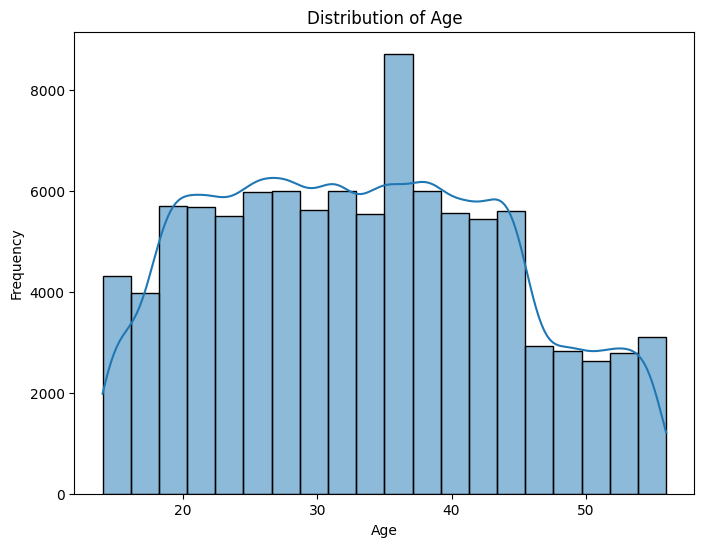

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

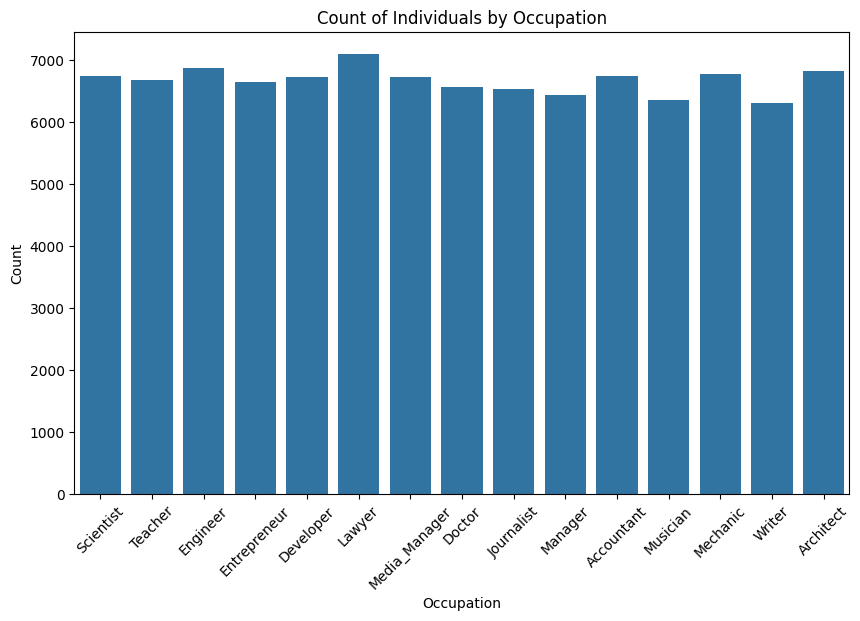

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', data=df)
plt.title('Count of Individuals by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.dtypes

Age                           int64
Occupation                   object
Annual_Income               float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Num_of_Delayed_Payment        int64
Num_Credit_Inquiries          int64
Type_of_Credits              object
Total_Debt                  float64
Credit_Utilization_Ratio    float64
Previous_Payment_history     object
Payment_Behaviour            object
Credit_Score                 object
dtype: object

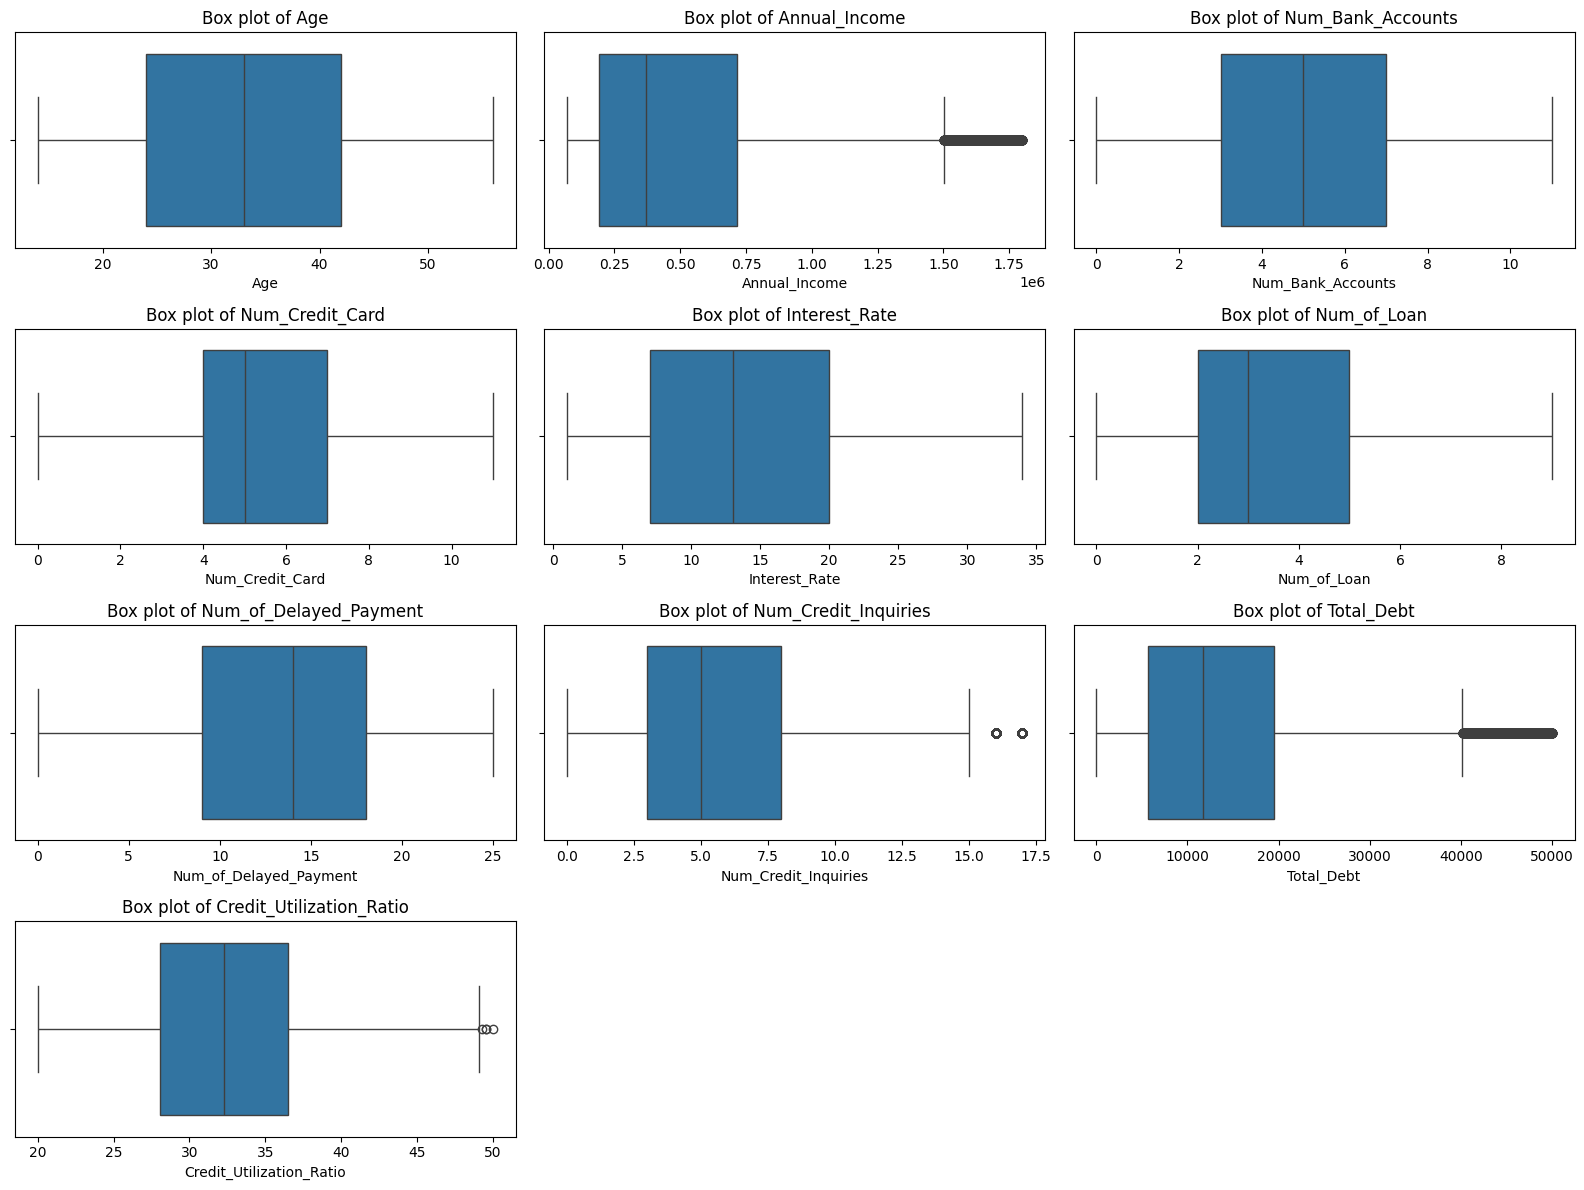

In [ ]:
numerical_columns = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
                     'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                     'Num_Credit_Inquiries', 'Total_Debt', 'Credit_Utilization_Ratio']

# Plot box plots before outlier removal
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        return df  # If column is not numeric, return unchanged DataFrame

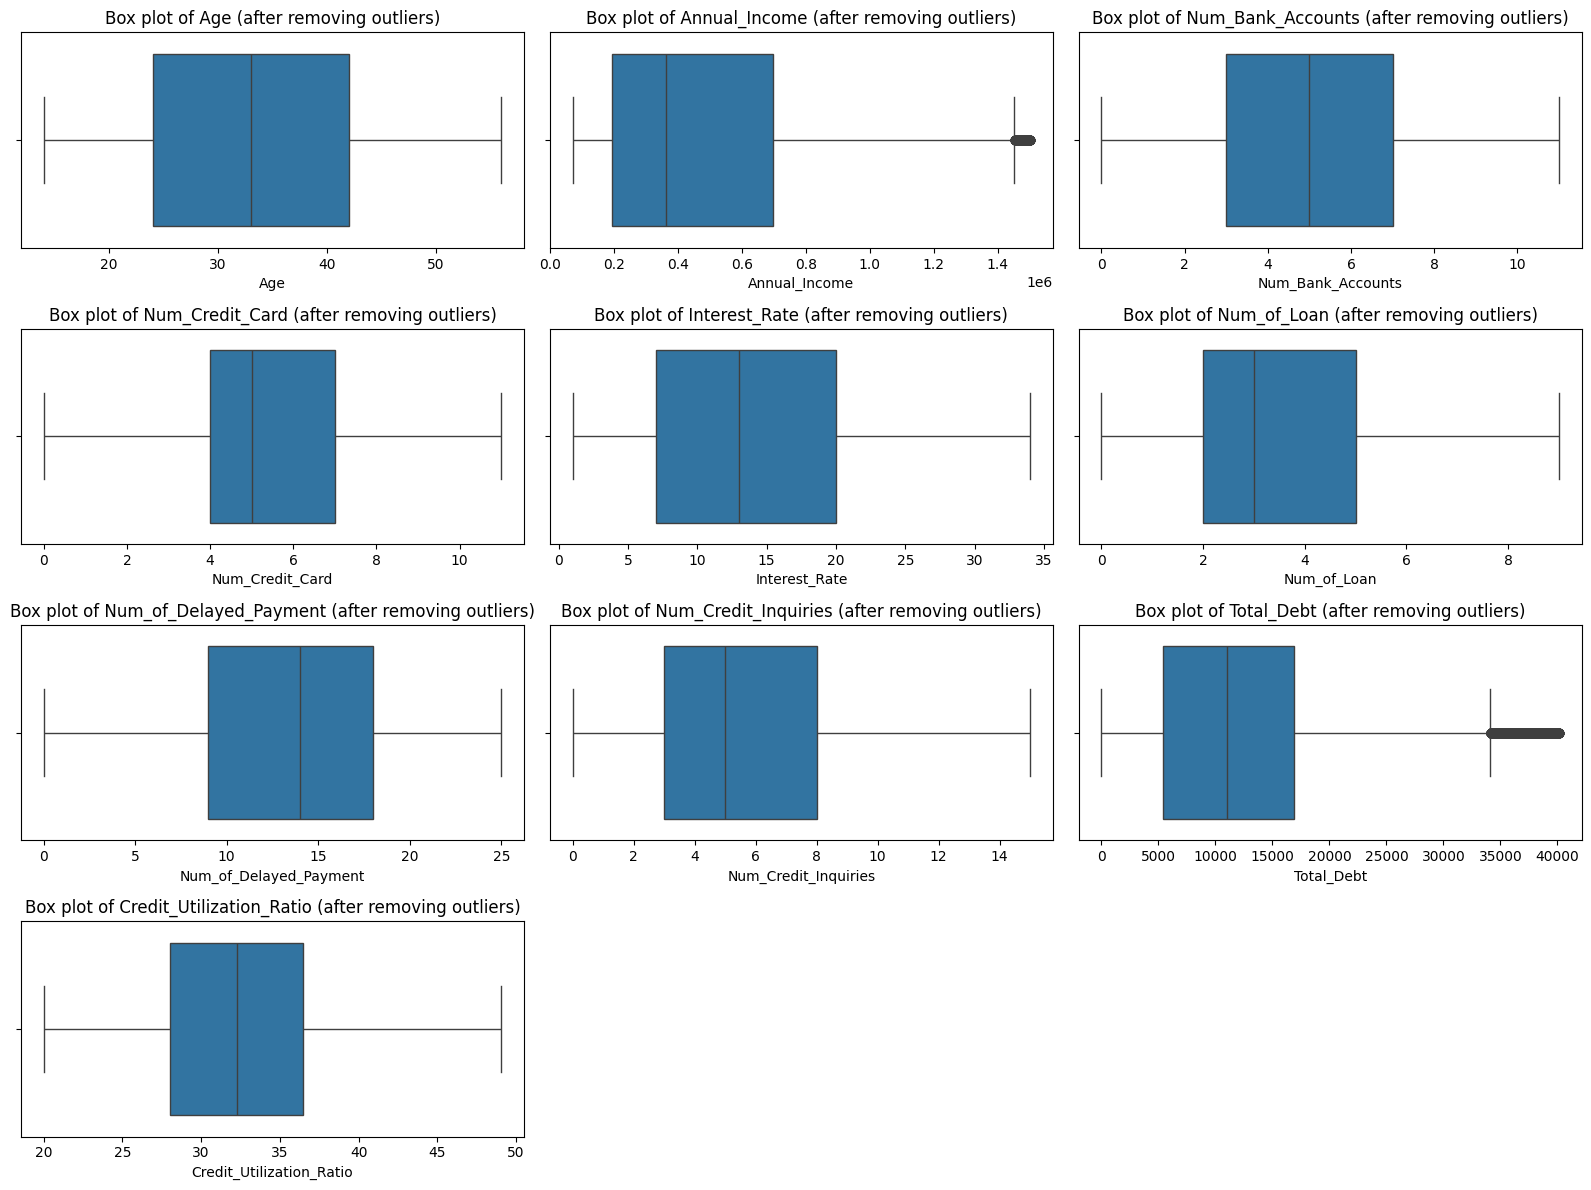

In [ ]:
# graph after outlier removal
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    df_cleaned = remove_outliers(df, col)
    plt.subplot(4, 3, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box plot of {col} (after removing outliers)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Violin plot of Age distribution by Occupation
fig = px.violin(df, x='Occupation', y='Age', box=True, points='all', title='Age Distribution by Occupation')
fig.show()

In [ ]:
# Count plot of Payment_Behaviour
fig = px.histogram(df, x='Payment_Behaviour', title='Count of Payment Behaviours')
fig.show()

In [ ]:
# Create separate pie charts for each categorical column
for col in df.select_dtypes(include='object'):
    counts = df[col].value_counts()
    fig = px.pie(names=counts.index, values=counts.values, title=f'Distribution of {col}')
    fig.show()

In [ ]:
# Current counts of each unique value in Credit_Score column
counts = df['Credit_Score'].value_counts()

# Determine the target count (max count among all)
target_count = counts.max()

# Oversample each unique value to match target_count
oversampled_data = []
for value in counts.index:
    subset = df[df['Credit_Score'] == value]
    oversampled_subset = subset.sample(target_count, replace=True, random_state=42)
    oversampled_data.append(oversampled_subset)

# Concatenate oversampled subsets into a new dataframe
df_oversampled = pd.concat(oversampled_data)

# Verify counts after oversampling
new_counts = df_oversampled['Credit_Score'].value_counts()
print("Counts after oversampling:")
print(new_counts)

Counts after oversampling:
Credit_Score
Standard    53174
Poor        53174
Good        53174
Name: count, dtype: int64


# **RANDOM FOREST**

Accuracy: 0.72
              precision    recall  f1-score   support

        Good       0.70      0.83      0.76     10785
        Poor       0.76      0.75      0.76     10671
    Standard       0.71      0.58      0.64     10449

    accuracy                           0.72     31905
   macro avg       0.72      0.72      0.72     31905
weighted avg       0.72      0.72      0.72     31905



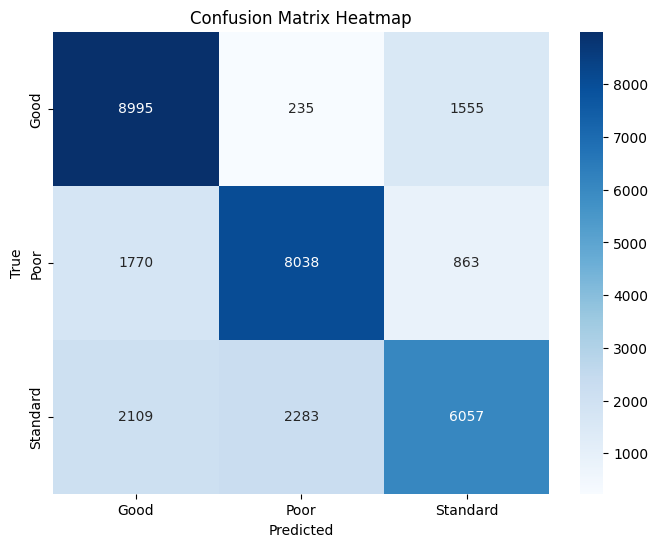

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Assuming df contains your preprocessed and feature engineered dataset

# Encode categorical variables
categorical_cols = ['Occupation', 'Type_of_Credits', 'Previous_Payment_history', 'Payment_Behaviour']
df_encoded = pd.get_dummies(df_oversampled, columns=categorical_cols, drop_first=True)

# Define features (X) and target variable (y)
X = df_encoded.drop('Credit_Score', axis=1)  # Features
y = df_encoded['Credit_Score']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Example parameters
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = model_rf.predict(X_test)

# Calculate metrics: accuracy, precision, recall, F1-score
accuracy_rf = model_rf.score(X_test, y_test)
print(f'Accuracy: {accuracy_rf:.2f}')

print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


# **XG BOOST**

Accuracy: 0.79
              precision    recall  f1-score   support

        Good       0.79      0.89      0.83     10785
        Poor       0.83      0.83      0.83     10671
    Standard       0.77      0.66      0.71     10449

    accuracy                           0.79     31905
   macro avg       0.79      0.79      0.79     31905
weighted avg       0.79      0.79      0.79     31905



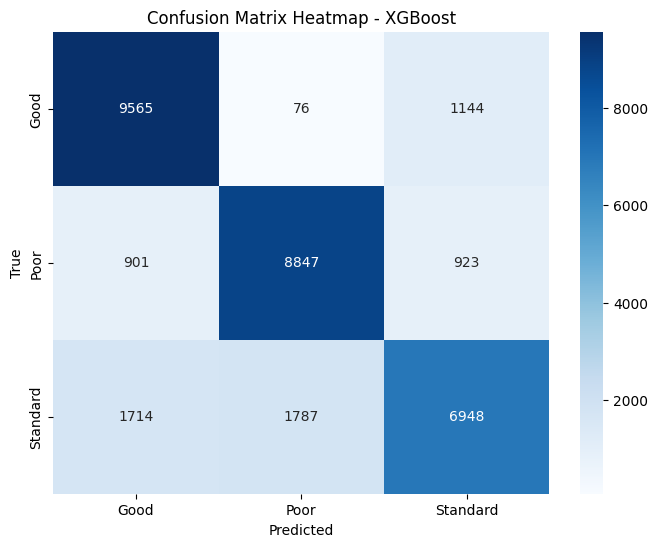

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df_encoded contains your preprocessed and feature engineered dataset with categorical variables encoded
# Encode categorical variables if not already done
categorical_cols = ['Occupation', 'Type_of_Credits', 'Previous_Payment_history', 'Payment_Behaviour']
df_encoded = pd.get_dummies(df_oversampled, columns=categorical_cols, drop_first=True)

# Encode target variable (Credit_Score)
label_encoder = LabelEncoder()
df_encoded['Credit_Score'] = label_encoder.fit_transform(df_encoded['Credit_Score'])

# Define features (X) and target variable (y)
X = df_encoded.drop('Credit_Score', axis=1)  # Features
y = df_encoded['Credit_Score']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model_xg = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)
model_xg.fit(X_train, y_train)

# Predict on the test set
y_pred = model_xg.predict(X_test)

# Calculate metrics: accuracy, precision, recall, F1-score
accuracy_xg = model_xg.score(X_test, y_test)
print(f'Accuracy: {accuracy_xg:.2f}')

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap - XGBoost')
plt.show()

# **Gradient Boosting Machine (GBM)**

Accuracy: 0.74
              precision    recall  f1-score   support

        Good       0.71      0.84      0.77     10785
        Poor       0.78      0.76      0.77     10671
    Standard       0.72      0.61      0.66     10449

    accuracy                           0.74     31905
   macro avg       0.74      0.74      0.73     31905
weighted avg       0.74      0.74      0.73     31905



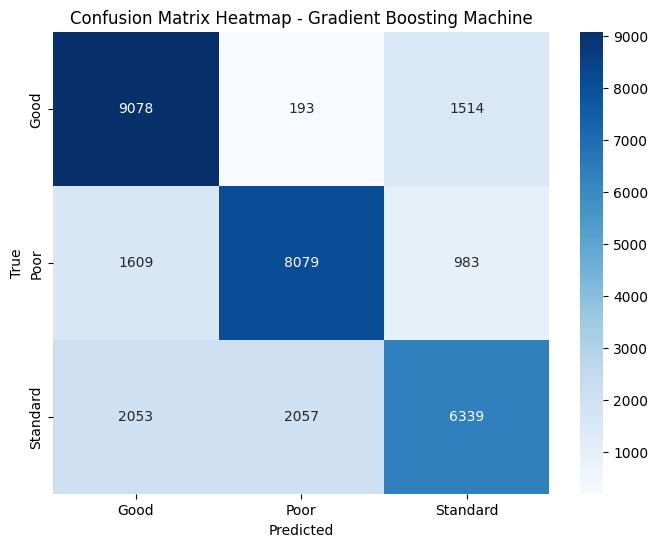

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df_encoded contains your preprocessed and feature engineered dataset with categorical variables encoded
# Encode categorical variables if not already done
categorical_cols = ['Occupation', 'Type_of_Credits', 'Previous_Payment_history', 'Payment_Behaviour']
df_encoded = pd.get_dummies(df_oversampled, columns=categorical_cols, drop_first=True)

# Encode target variable (Credit_Score)
label_encoder = LabelEncoder()
df_encoded['Credit_Score'] = label_encoder.fit_transform(df_encoded['Credit_Score'])

# Define features (X) and target variable (y)
X = df_encoded.drop('Credit_Score', axis=1)  # Features
y = df_encoded['Credit_Score']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GBM model
model_gbm = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.1, random_state=42)
model_gbm.fit(X_train, y_train)

# Predict on the test set
y_pred = model_gbm.predict(X_test)

# Calculate metrics: accuracy, precision, recall, F1-score
accuracy_gbm = model_gbm.score(X_test, y_test)
print(f'Accuracy: {accuracy_gbm:.2f}')

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap - Gradient Boosting Machine')
plt.show()


Accuracy: 0.87
              precision    recall  f1-score   support

        Good       0.88      0.95      0.92     10785
        Poor       0.87      0.93      0.90     10671
    Standard       0.85      0.73      0.79     10449

    accuracy                           0.87     31905
   macro avg       0.87      0.87      0.87     31905
weighted avg       0.87      0.87      0.87     31905



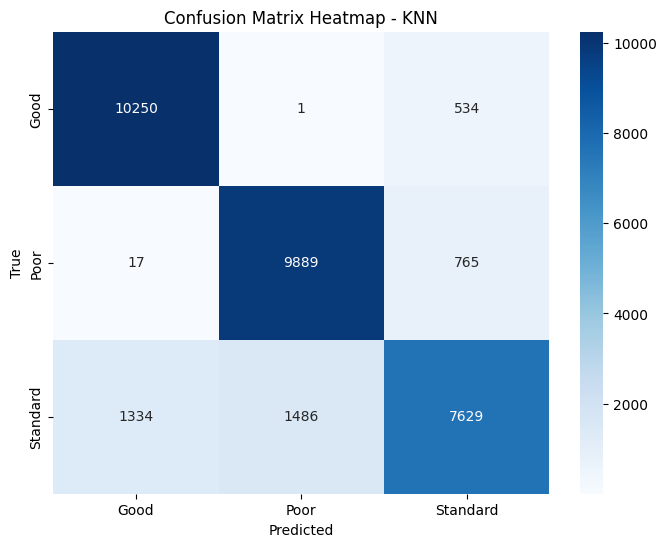

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df_encoded contains your preprocessed and feature engineered dataset with categorical variables encoded
# Encode categorical variables if not already done
categorical_cols = ['Occupation', 'Type_of_Credits', 'Previous_Payment_history', 'Payment_Behaviour']
df_encoded = pd.get_dummies(df_oversampled, columns=categorical_cols, drop_first=True)

# Encode target variable (Credit_Score)
label_encoder = LabelEncoder()
df_encoded['Credit_Score'] = label_encoder.fit_transform(df_encoded['Credit_Score'])

# Define features (X) and target variable (y)
X = df_encoded.drop('Credit_Score', axis=1)  # Features
y = df_encoded['Credit_Score']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)  # Example parameter: number of neighbors (k) = 5
model_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = model_knn.predict(X_test)

# Calculate metrics: accuracy, precision, recall, F1-score
accuracy_knn = model_knn.score(X_test, y_test)
print(f'Accuracy: {accuracy_knn:.2f}')

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap - KNN')
plt.show()


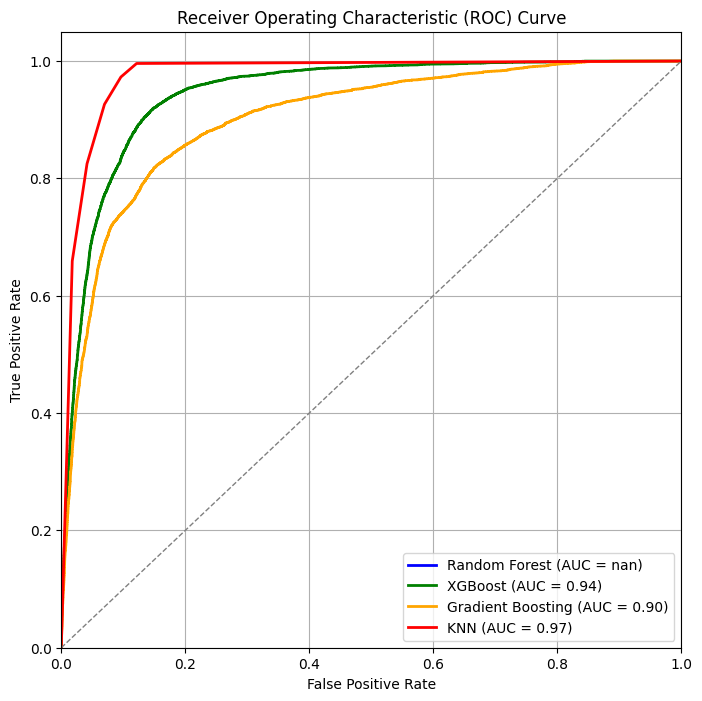

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
probs_rf = model_rf.predict_proba(X_test)
probs_xg = model_xg.predict_proba(X_test)
probs_gbm = model_gbm.predict_proba(X_test)
probs_knn = model_knn.predict_proba(X_test)

# Compute ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf[:, 1], pos_label=model_rf.classes_[1])
fpr_xg, tpr_xg, _ = roc_curve(y_test, probs_xg[:, 1], pos_label=model_xg.classes_[1])
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, probs_gbm[:, 1], pos_label=model_gbm.classes_[1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn[:, 1], pos_label=model_knn.classes_[1])

# Calculate AUC (Area Under the Curve)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xg = auc(fpr_xg, tpr_xg)
auc_gbm = auc(fpr_gbm, tpr_gbm)
auc_knn = auc(fpr_knn, tpr_knn)

# Plotting ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xg, tpr_xg, color='green', lw=2, label=f'XGBoost (AUC = {auc_xg:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='orange', lw=2, label=f'Gradient Boosting (AUC = {auc_gbm:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **Stratified 5 Fold cross validation on KNN**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)

# Define cross-validation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model_knn, X, y, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:")
print(cv_scores)

# Calculate mean accuracy across folds
print(f"Mean Accuracy: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")

Cross-validation scores:
[0.86983231 0.87133678 0.87333877 0.86932673 0.87161484]
Mean Accuracy: 0.87 (±0.00)


In [ ]:
for column in df_oversampled.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print("\n")

Unique values in Age:
[23 28 34 54 55 21 31 33 30 24 44 45 40 41 32 35 36 39 37 20 46 26 42 19
 48 38 43 22 16 18 15 27 25 14 17 47 53 56 29 49 51 50 52]


Unique values in Occupation:
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


Unique values in Annual_Income:
[ 191141.2  348478.4 1431626.4 ...  371881.   200028.8  396289.9]


Unique values in Num_Bank_Accounts:
[ 3  2  1  7  4  0  8  5  6  9 10 11]


Unique values in Num_Credit_Card:
[ 4  5  1  7  6  8  3  9  2 10 11  0]


Unique values in Interest_Rate:
[ 3  6  8  4  5 15  7 12 20  1 14 32 16 17 10 31 25 18 19  9 24 13 33 11
 21 29 28 30 23 34  2 27 26 22]


Unique values in Num_of_Loan:
[4 1 3 0 2 7 5 6 8 9]


Unique values in Num_of_Delayed_Payment:
[ 7  4  8  6  1  3  0  5  9 15 12 17 10  2 11 14 20 22 13 16 19 18 21 23
 24 25]


Unique values in Num_Credit_Inquiries:
[ 4  2  3  5  9  8  7  6  0  1

In [ ]:
import joblib
filename = 'knn_model.pkl'
joblib.dump(model_knn, filename)

['knn_model.pkl']

In [ ]:
import pandas
import sklearn
import numpy
print(joblib.__version__)
print(pandas.__version__)
print(sklearn.__version__)
print(numpy.__version__)

1.4.2
2.0.3
1.2.2
1.25.2
